<a href="https://colab.research.google.com/github/lkarjun/Titanic/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/lkarjun/Titanic/main/train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


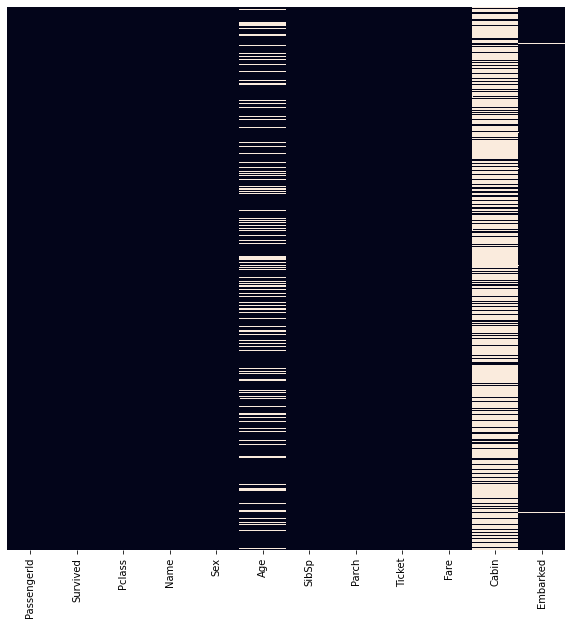

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), cmap=None, yticklabels=False, cbar=False);

## Data Visualizing

Total Succesfully Survived: 342
Total Died: 549



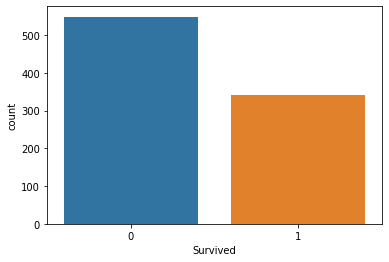

In [81]:
sns.countplot(x='Survived', data = df);
print(f"Total Succesfully Survived: {df.Survived[df.Survived == 1].value_counts()[1]}")
print(f"Total Died: {df.Survived[df.Survived == 0].value_counts()[0]}");print()

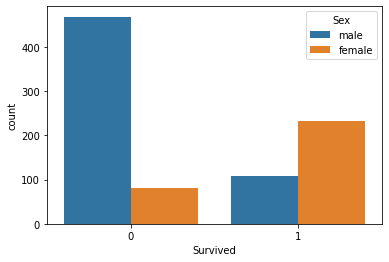

In [9]:
sns.countplot(x='Survived', hue='Sex', data = df)

In [27]:
print("Male survivors %: ", 
      df.Survived[df.Sex == 'male'].value_counts(normalize=True)[1]*100)

print("Feale survivors %: ", 
      df.Survived[df.Sex == 'female'].value_counts(normalize=True)[1]*100)

Male survivors %:  18.890814558058924
Feale survivors %:  74.20382165605095


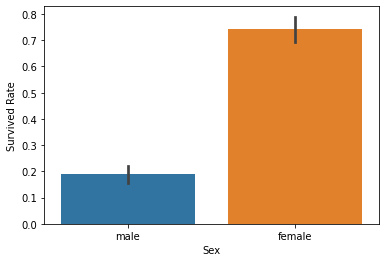

In [28]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.ylabel('Survived Rate')
plt.show()

Pclass 1 Survived %: 62.96 %
Pclass 2 Survived %: 47.28 %
Pclass 3 Survived %: 24.24 %



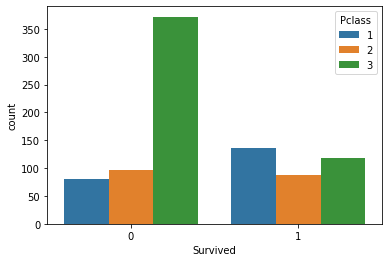

In [57]:
print(f"Pclass 1 Survived %: {round(df.Survived[df.Pclass == 1].value_counts(normalize=True)[1] * 100, 2)} %" )
print(f"Pclass 2 Survived %: {round(df.Survived[df.Pclass == 2].value_counts(normalize=True)[1] * 100, 2)} %" )
print(f"Pclass 3 Survived %: {round(df.Survived[df.Pclass == 3].value_counts(normalize=True)[1] * 100, 2)} %" )

print()

sns.countplot(x='Survived', hue='Pclass', data=df);

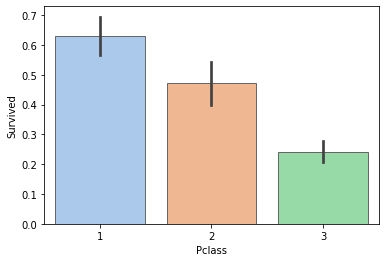

In [63]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='pastel', edgecolor='.4');

In [84]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

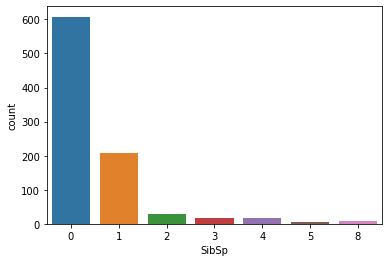

In [85]:
sns.countplot(data = df, x='SibSp')

Survived Passengers with Sibsp 0: 34.54
Survived Passengers with Sibsp 1: 53.59
Survived Passengers with Sibsp 2: 46.43
Survived Passengers with Sibsp 3: 25.0


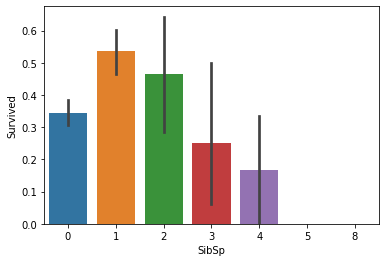

In [96]:
print(f"Survived Passengers with Sibsp 0: {round(df.Survived[df.SibSp==0].value_counts(normalize=True)[1] * 100, 2)}")
print(f"Survived Passengers with Sibsp 1: {round(df.Survived[df.SibSp==1].value_counts(normalize=True)[1] * 100, 2)}")
print(f"Survived Passengers with Sibsp 2: {round(df.Survived[df.SibSp==2].value_counts(normalize=True)[1] * 100, 2)}")
print(f"Survived Passengers with Sibsp 3: {round(df.Survived[df.SibSp==3].value_counts(normalize=True)[1] * 100, 2)}")

sns.barplot(y ='Survived', x = 'SibSp', data = df)

In [98]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

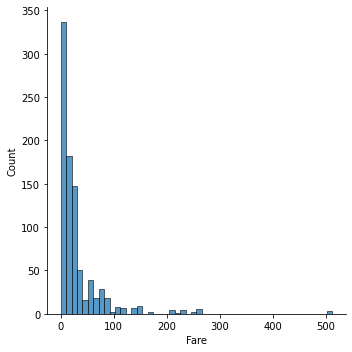

In [113]:
sns.displot(df.Fare.dropna(), bins = 50)

In [115]:
print(df.Embarked.isna().sum())

df.Embarked = df.Embarked.fillna('S')

2
